In [1]:
import pandas as pd
import sqlite3

!pip3 install ipython-sql
!pip3 install mysqlclient
! pip install PyMySQL

In [2]:
pip install voila

  Using cached voila-0.2.10-py3-none-any.whl (1.6 MB)
  Using cached jupyter_server-1.10.2-py3-none-any.whl (392 kB)
  Using cached websocket_client-1.2.1-py2.py3-none-any.whl (52 kB)
  Using cached requests_unixsocket-0.2.0-py2.py3-none-any.whl (11 kB)
  Using cached anyio-3.3.0-py3-none-any.whl (77 kB)
  Using cached sniffio-1.2.0-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install widgetsnbextension

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter serverextension enable voila --sys-prefix

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling: voila
- Writing config: C:\Users\USER\anaconda3\etc\jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


In [4]:
import pymysql

import pandas as a

conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='',db='contacts_database')

df=a.read_sql_query("SELECT * FROM locations ",conn)
df2=a.read_sql_query("SELECT * FROM message ",conn)

In [5]:
df

,province,city/municipality,barangay,street_no,location_id
0,Benguet,La Trinidad,Pico,Pico Barangay Hall,1
1,Benguet,La Trinidad,Km. 6 Halsema Highway,Regional Office DOST-CAR,2
2,Benguet,La Trinidad,Pico,"Municipal Hall, JC-196 Pico Rd.",3
3,-,-,-,-,4
4,Benguet,La Trinidad,Balili,Balili Barangay Hall,5
5,Benguet,La Trinidad,Balili,Balili Barangay Hall,6


In [6]:
df2

,rtc_timestamp,gsm_timestamp,mobile_no,device_id,visitor_count,SD_State,time_difference,msg_id


In [7]:
#identify the number of devices
devices = df2['device_id'].unique().tolist()
devices.sort()

devices

[]

In [8]:
#statement for selecting date with latest visitor count
statement1 = "SELECT gsm_timestamp FROM message"
dev2 = a.read_sql_query(statement1, conn)
dev2

,gsm_timestamp


In [10]:
#select specific date to plot
# to add dropdowns for selecting date and time
statement= '(\'2021-03-20\')'
date = "SELECT gsm_timestamp, visitor_count FROM message WHERE DATE(gsm_timestamp) = DATE" + statement
dev3 = a.read_sql_query(date, conn)

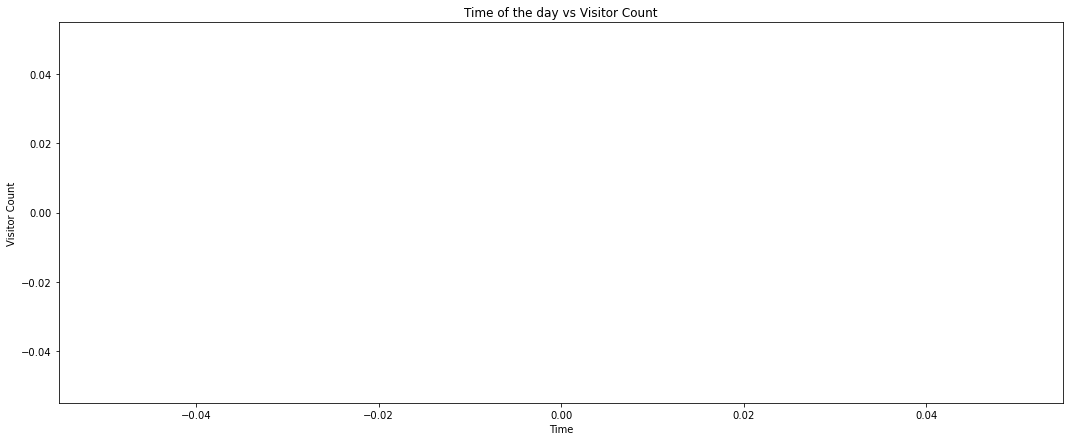

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 7))

plt.plot(dev3['gsm_timestamp'],dev3['visitor_count'])
plt.title('Time of the day vs Visitor Count')
plt.xlabel('Time')
plt.ylabel('Visitor Count')
plt.show()

In [12]:
display(plt.show())

None